In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory/user/prash..medical
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/eye-disease-data-sets/dataset/glaucoma/1255_right.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/1482_left.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/_398_8823411.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/_309_4110303.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/_13_697490.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/_205_310538.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/Glaucoma_040.png
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/1256_right.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/_221_3079640.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/_392_9636183.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/_12_5295071.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/_399_7128170.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/_113_8738972.jpg
/kaggle/input/eye-disease-data-sets/dataset/glaucoma/_366_3572426.jpg
/kaggle/input/eye-disease-data-

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
import joblib
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gunavenkatdoddi/eye-diseases-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/eye-diseases-classification


In [4]:
data_dir='/kaggle/input/eye-disease-data-sets/dataset'
filepath=[]
labels=[]
folds=os.listdir(data_dir)
for fold in folds:
    filpath=os.path.join(data_dir,fold)
    filelist=os.listdir(filpath)
    for f in filelist:
        fpath=os.path.join(filpath,f)
        filepath.append(fpath)
        labels.append(fold)
f_series=pd.Series(filepath,name='filepath') 
l_series=pd.Series(labels,name='labels')
df=pd.concat([f_series,l_series],axis=1)

In [5]:
df

,filepath,labels
0,/kaggle/input/eye-disease-data-sets/dataset/gl...,glaucoma
1,/kaggle/input/eye-disease-data-sets/dataset/gl...,glaucoma
2,/kaggle/input/eye-disease-data-sets/dataset/gl...,glaucoma
3,/kaggle/input/eye-disease-data-sets/dataset/gl...,glaucoma
4,/kaggle/input/eye-disease-data-sets/dataset/gl...,glaucoma
...,...,...
4212,/kaggle/input/eye-disease-data-sets/dataset/ca...,cataract
4213,/kaggle/input/eye-disease-data-sets/dataset/ca...,cataract
4214,/kaggle/input/eye-disease-data-sets/dataset/ca...,cataract
4215,/kaggle/input/eye-disease-data-sets/dataset/ca...,cataract


In [6]:
strat=df['labels']
train_df,dummy_df=train_test_split(df,test_size=0.3,random_state=42,stratify=strat)
strate=dummy_df['labels']
valid_df,test_df=train_test_split(dummy_df,test_size=0.5,random_state=42,stratify=strate)

In [7]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(2951, 2)
(633, 2)
(633, 2)


In [8]:
count_train=train_df['labels'].value_counts().reset_index()
count_train.columns=['label','count']
fig=px.bar(count_train,x='label',y='count',title='count of train_df',text_auto=True)
fig.show()

In [9]:
count_test=test_df['labels'].value_counts().reset_index()
count_test.columns=['label','count']
fig=px.bar(count_test,x='label',y='count',title='count of test_df',text_auto=True)
fig.show()

In [10]:
count_valid=valid_df['labels'].value_counts().reset_index()
count_valid.columns=['label','count']
fig=px.bar(count_valid,x='label',y='count',title='count of valid_df',text_auto=True)
fig.show()

In [11]:
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe(test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 2951 validated image filenames belonging to 4 classes.
Found 633 validated image filenames belonging to 4 classes.
Found 633 validated image filenames belonging to 4 classes.


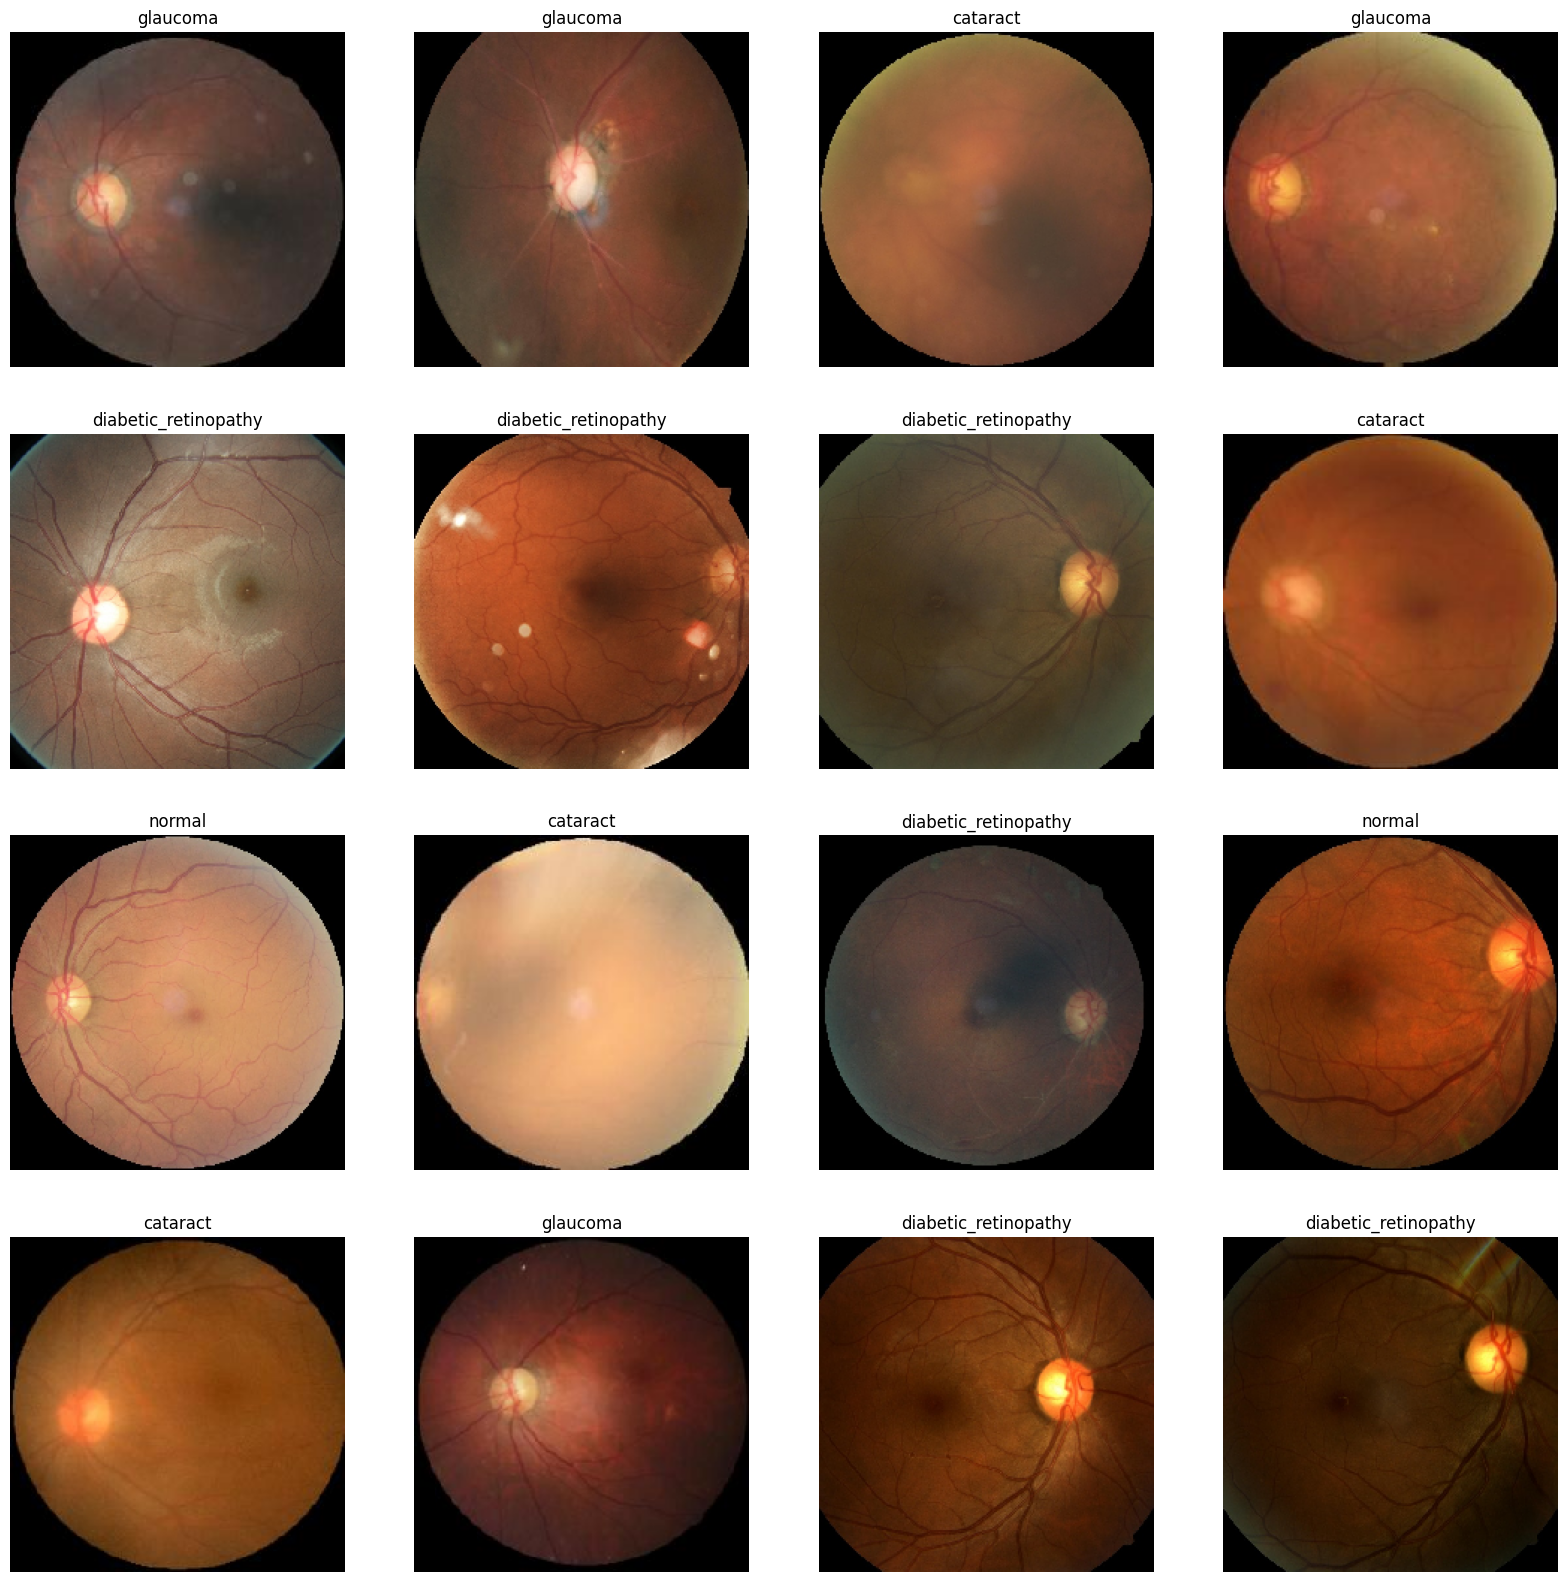

In [12]:
g_dict = train_gen.class_indices    
classes = list(g_dict.keys())      
images, labels = next(train_gen)     

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255      
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax

# Load VGG16 model without the top classification layer
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers in the base model to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Build the sequential model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes in the dataset
])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model structure
model.summary()


In [ ]:
base_model=keras.applications.EfficientNetB3(include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))
model=Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
])
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))


In [ ]:
base_model = keras.applications.EfficientNetB3(
    include_top=False,
    weights=None,
    input_shape=(224, 224, 3)
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the complete model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Assuming you have 4 classes to predict
])


In [ ]:
from tensorflow.keras.optimizers import Adamax

model.compile(optimizer=Adamax(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/eye-disease-data-sets/dataset',  # Directory containing our training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/eye-disease-data-sets/dataset',  # Same directory, different subset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust the number of epochs as necessary
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/eye-disease-data-sets/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/eye-disease-data-sets/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/eye-disease-data-sets/dataset',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')


In [14]:
base_model = keras.applications.EfficientNetB3(
    include_top=False,
    weights='/kaggle/input/pretrain-model/efficientnetb3_notop.h5',  # The path of pretrained model
    input_shape=(224, 224, 3)
)
model=Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
])
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [15]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
history=model.fit(train_gen,epochs=11,validation_data=valid_gen,shuffle=False,
                  callbacks=[early_stopping])

Epoch 1/11
93/93 ━━━━━━━━━━━━━━━━━━━━ 1158s 12s/step - accuracy: 0.7090 - loss: 1.0413 - val_accuracy: 0.7393 - val_loss: 0.8067
Epoch 2/11
93/93 ━━━━━━━━━━━━━━━━━━━━ 1073s 12s/step - accuracy: 0.9280 - loss: 0.2001 - val_accuracy: 0.7899 - val_loss: 0.5938
Epoch 3/11
93/93 ━━━━━━━━━━━━━━━━━━━━ 1074s 12s/step - accuracy: 0.9565 - loss: 0.1270 - val_accuracy: 0.8847 - val_loss: 0.3016
Epoch 4/11
93/93 ━━━━━━━━━━━━━━━━━━━━ 1072s 12s/step - accuracy: 0.9812 - loss: 0.0605 - val_accuracy: 0.8926 - val_loss: 0.3603
Epoch 5/11
93/93 ━━━━━━━━━━━━━━━━━━━━ 1131s 12s/step - accuracy: 0.9934 - loss: 0.0279 - val_accuracy: 0.9258 - val_loss: 0.3081
Epoch 6/11
93/93 ━━━━━━━━━━━━━━━━━━━━ 1122s 12s/step - accuracy: 0.9905 - loss: 0.0310 - val_accuracy: 0.9226 - val_loss: 0.3404
Epoch 7/11
93/93 ━━━━━━━━━━━━━━━━━━━━ 1141s 12s/step - accuracy: 0.9870 - loss: 0.0417 - val_accuracy: 0.9258 - val_loss: 0.3279
Epoch 8/11
93/93 ━━━━━━━━━━━━━━━━━━━━ 1139s 12s/step - accuracy: 0.9868 - loss: 0.0397 - val_accu

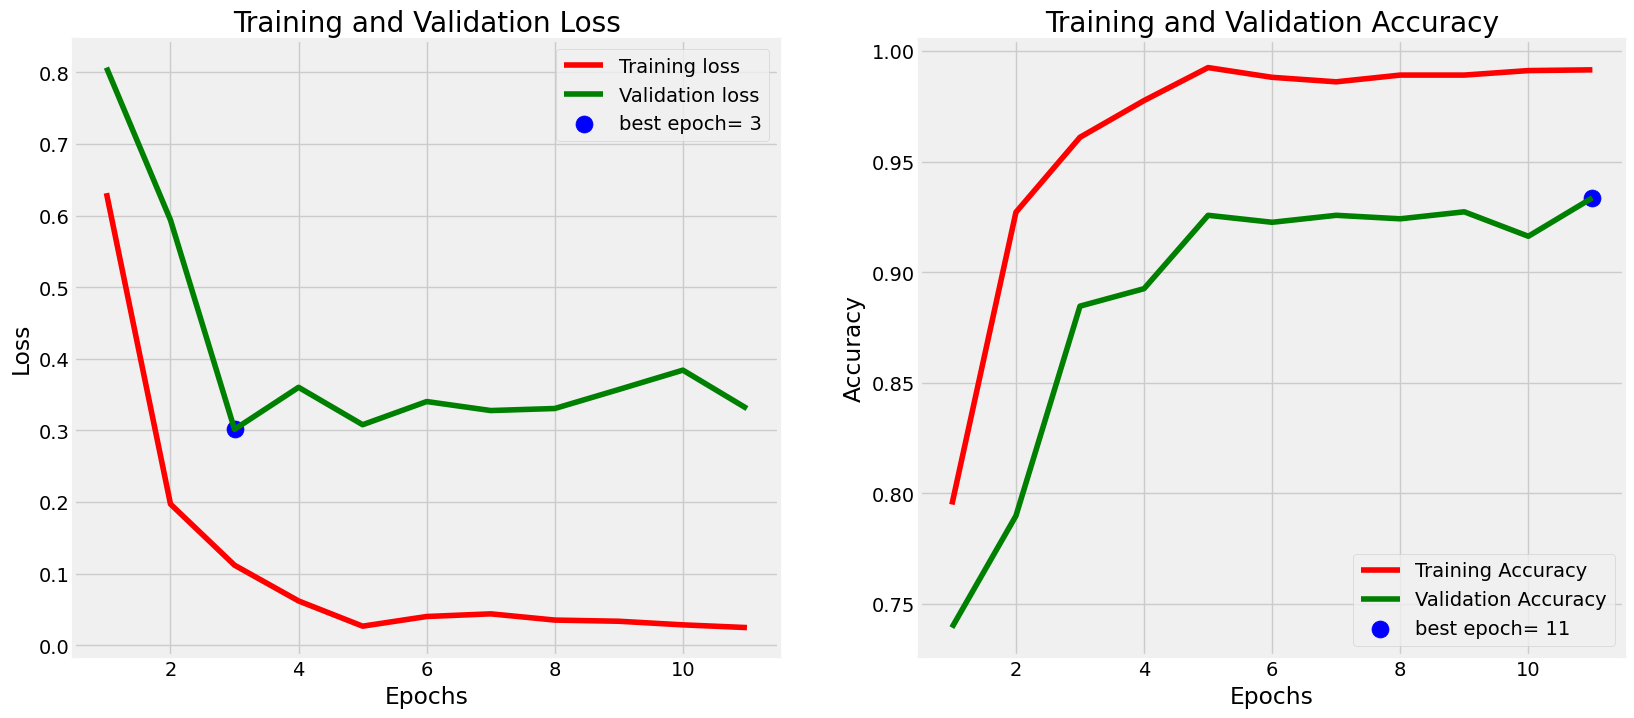

In [16]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


In [17]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

211/211 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.9561 - loss: 0.1212
211/211 ━━━━━━━━━━━━━━━━━━━━ 49s 217ms/step - accuracy: 0.8840 - loss: 0.3025
211/211 ━━━━━━━━━━━━━━━━━━━━ 48s 218ms/step - accuracy: 0.9056 - loss: 0.3085
Train Loss:  0.12715548276901245
Train Accuracy:  0.953575074672699
--------------------
Valid Loss:  0.3016434609889984
Valid Accuracy:  0.8846761584281921
--------------------
Test Loss:  0.3099890351295471
Test Accuracy:  0.9052132964134216


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image for prediction
img_path = '/kaggle/input/eye-disease-data-sets/dataset/glaucoma/1210_left.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted class: 0


In [22]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step


In [23]:
print(y_pred)

[3 1 0 3 0 1 0 2 3 2 1 3 3 1 0 1 2 2 1 0 1 2 0 0 0 3 2 1 2 0 3 3 0 3 1 1 3
 2 1 0 2 1 3 0 1 2 1 3 3 2 3 2 0 3 2 3 1 2 1 3 2 1 2 1 3 1 2 1 0 1 2 0 1 0
 3 1 1 1 0 1 0 1 1 0 3 0 2 1 3 0 2 2 1 0 1 2 1 0 0 2 2 0 1 1 2 1 0 3 1 0 0
 0 1 2 3 3 2 3 2 0 1 3 3 0 2 3 1 0 3 0 3 0 1 2 0 0 0 2 1 1 0 2 0 1 3 0 3 2
 3 3 3 1 3 3 1 2 3 1 0 1 2 3 1 0 3 2 3 0 0 0 2 0 0 1 2 3 1 3 2 2 0 0 0 0 2
 3 0 3 1 3 0 1 3 1 2 3 2 3 0 3 1 1 2 3 2 3 0 3 0 0 0 0 1 2 3 2 0 1 1 1 3 3
 2 3 2 1 0 1 3 1 0 0 3 1 0 2 0 0 3 1 0 2 1 3 3 1 3 0 0 3 1 2 3 2 0 3 0 0 0
 1 3 3 0 1 2 3 2 3 1 0 2 1 3 2 1 1 1 2 0 1 3 3 0 2 0 1 3 1 2 2 1 1 1 2 2 0
 0 3 1 0 2 3 3 3 2 0 2 2 2 2 3 3 0 2 3 2 0 1 2 1 2 2 2 1 2 3 1 0 3 0 2 1 1
 2 2 3 2 0 0 1 2 1 1 0 0 0 2 1 1 3 0 2 1 3 3 3 2 2 0 1 1 2 3 2 0 2 2 3 0 2
 1 1 1 2 0 0 0 1 3 2 0 0 3 3 1 2 3 3 3 3 1 2 3 1 1 0 0 3 3 0 0 3 0 3 0 1 0
 0 1 3 3 2 3 3 0 0 3 3 1 3 0 2 2 3 3 0 3 1 2 1 2 1 2 2 0 0 1 0 1 1 0 3 2 3
 0 0 2 1 3 3 0 0 0 3 0 0 1 2 0 0 2 2 3 1 1 0 0 2 2 3 3 1 1 2 0 1 3 3 0 1 1
 1 2 0 3 3 3 2 0 0 2 2 2 

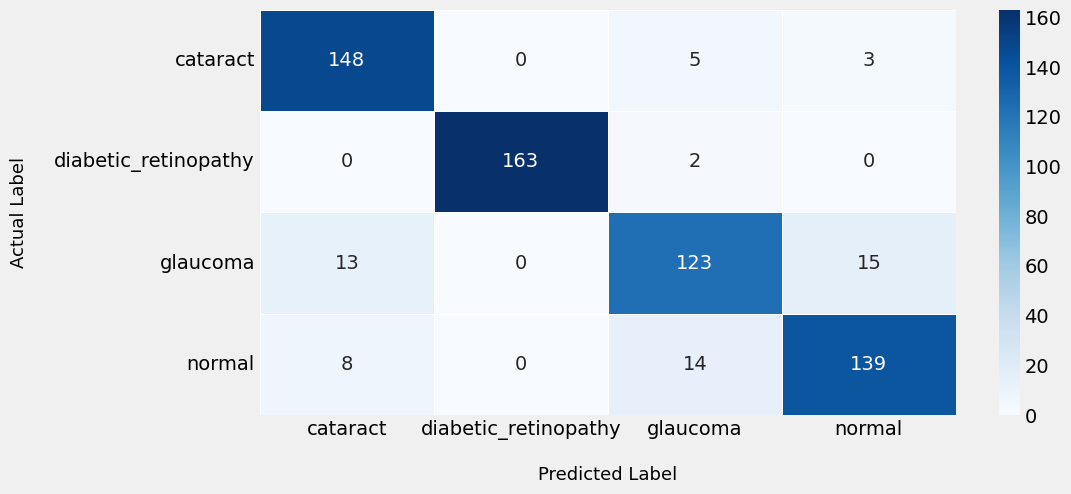

In [24]:
plt.figure(figsize=(10,5))
cm=confusion_matrix(test_gen.classes,y_pred)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

In [25]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                      precision    recall  f1-score   support

            cataract       0.88      0.95      0.91       156
diabetic_retinopathy       1.00      0.99      0.99       165
            glaucoma       0.85      0.81      0.83       151
              normal       0.89      0.86      0.87       161

            accuracy                           0.91       633
           macro avg       0.90      0.90      0.90       633
        weighted avg       0.91      0.91      0.90       633



In [26]:
joblib.dump(model,"mediscan_eye_disease_classification.pkl")

['mediscan_eye_disease_classification.pkl']